In [8]:
import pandas as pd

class ModelData:
    def __init__(self, name):
        self.name = name
        self.metrics = {}
        self.resources = {}

    def input_metrics(self):
        print(f"\nEnter metrics for {self.name}:")
        self.metrics['accuracy'] = float(input("Accuracy (%): ")) / 100
        self.metrics['loss'] = float(input("Loss: "))
        self.metrics['precision'] = float(input("Precision: "))
        self.metrics['recall'] = float(input("Recall: "))
        self.metrics['f1_score'] = float(input("F1-Score: "))
        self.metrics['roc_auc'] = float(input("ROC AUC: "))

    def input_resources(self):
        print(f"\nEnter resource usage for {self.name}:")
        self.resources['ram_usage'] = float(input("Peak RAM usage (KB): "))
        self.resources['flash_usage'] = float(input("Flash usage (KB): "))
        self.resources['latency'] = float(input("Inference latency (ms): "))

def main():
    models = []
    
    while True:
        name = input("Enter model name (or 'done' to finish): ")
        if name.lower() == 'done':
            break
            
        model = ModelData(name)
        model.input_metrics()
        model.input_resources()
        models.append(model)

    # Create DataFrame for metrics
    metrics_data = []
    for model in models:
        metrics_data.append({
            'Model': model.name,
            **model.metrics
        })
    df_metrics = pd.DataFrame(metrics_data)

    # Create DataFrame for resources
    resources_data = []
    for model in models:
        resources_data.append({
            'Model': model.name,
            **model.resources
        })
    df_resources = pd.DataFrame(resources_data)

    # Display results
    print("\nCollected Metrics:")
    print(df_metrics.to_string(index=False))
    print("\nCollected Resource Usage:")
    print(df_resources.to_string(index=False))

if __name__ == "__main__":
    main()

Enter model name (or 'done' to finish):  MFE+CNN



Enter metrics for MFE+CNN:


Accuracy (%):  98.3
Loss:  0.04
Precision:  0.98
Recall:  0.988
F1-Score:  0.98
ROC AUC:  0.98



Enter resource usage for MFE+CNN:


Peak RAM usage (KB):  23.2
Flash usage (KB):  63
Inference latency (ms):  9
Enter model name (or 'done' to finish):  MFCC+CNN



Enter metrics for MFCC+CNN:


Accuracy (%):  97.7
Loss:  0.13
Precision:  0.98
Recall:  0.98
F1-Score:  0.98
ROC AUC:  0.98



Enter resource usage for MFCC+CNN:


Peak RAM usage (KB):  16.5
Flash usage (KB):  57.7
Inference latency (ms):  16
Enter model name (or 'done' to finish):  done



Collected Metrics:
   Model  accuracy  loss  precision  recall  f1_score  roc_auc
 MFE+CNN     0.983  0.04       0.98   0.988      0.98     0.98
MFCC+CNN     0.977  0.13       0.98   0.980      0.98     0.98

Collected Resource Usage:
   Model  ram_usage  flash_usage  latency
 MFE+CNN       23.2         63.0      9.0
MFCC+CNN       16.5         57.7     16.0


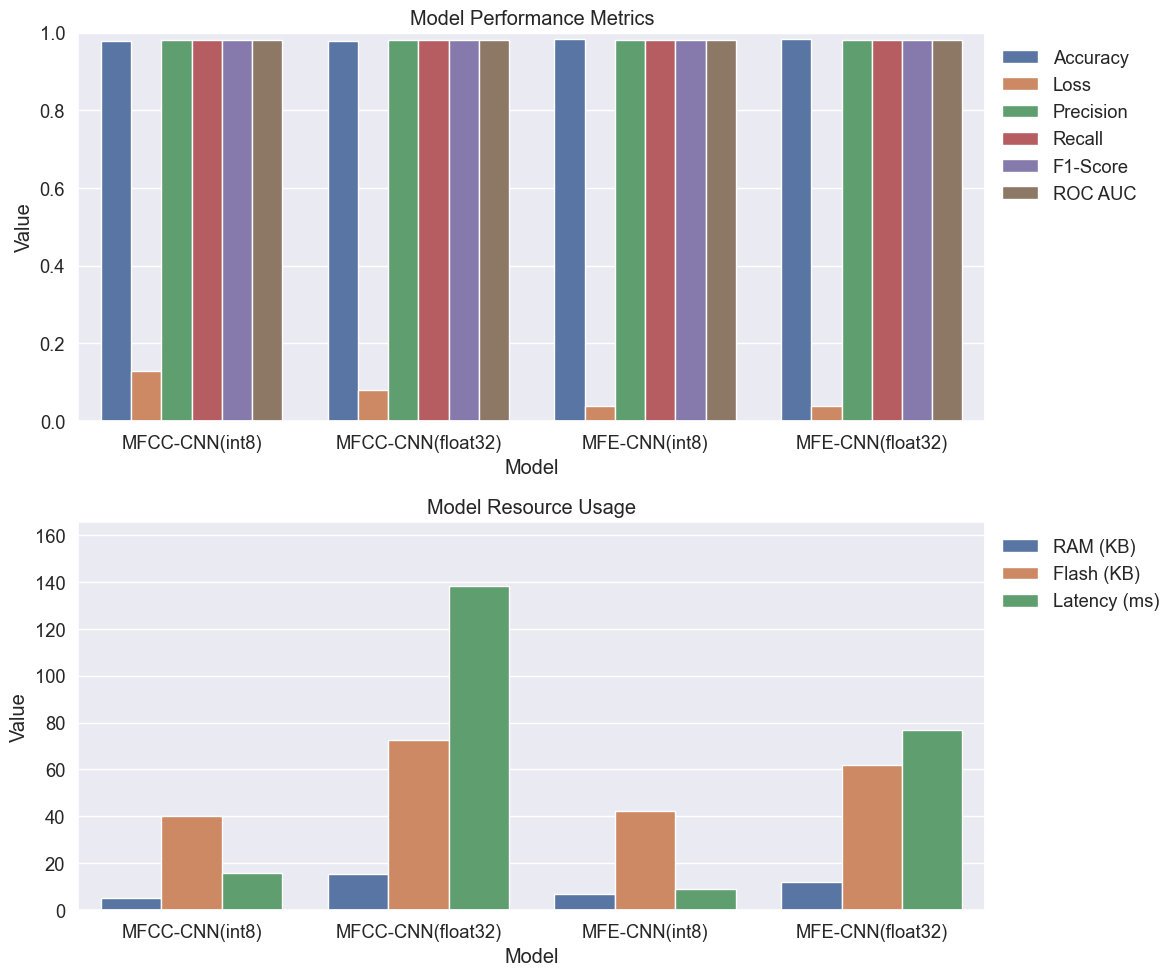

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with actual data from manual input)
data_metrics = {
    'Model': ['MFCC-CNN(int8)', 'MFCC-CNN(float32)','MFE-CNN(int8)', 'MFE-CNN(float32)'],
    'Accuracy': [0.977, 0.977,0.983,0.983],
    'Loss': [0.13, 0.08,0.04,0.04],
    'Precision': [0.98, 0.98,0.98, 0.98],
    'Recall': [0.98, 0.98,0.98, 0.98],
    'F1-Score': [0.98, 0.98,0.98, 0.98],
    'ROC AUC': [0.98, 0.98,0.98, 0.98]
}

data_resources = {
    'Model': ['MFCC-CNN(int8)', 'MFCC-CNN(float32)','MFE-CNN(int8)', 'MFE-CNN(float32)'],
    'RAM (KB)': [5.4, 15.6,6.8,12.1],
    'Flash (KB)': [40.2, 72.4,42.4,62.1],
    'Latency (ms)': [16, 138,9,77]
}

df_metrics = pd.DataFrame(data_metrics)
df_resources = pd.DataFrame(data_resources)

# Melt data for plotting
df_metrics_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Value')
df_resources_melted = df_resources.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Create figure and axes
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot performance metrics
sns.barplot(x='Model', y='Value', hue='Metric', data=df_metrics_melted, ax=axes[0])
axes[0].set_title('Model Performance Metrics')
axes[0].set_ylim(0, 1)
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Plot resource usage
sns.barplot(x='Model', y='Value', hue='Metric', data=df_resources_melted, ax=axes[1])
axes[1].set_title('Model Resource Usage')
axes[1].set_ylim(0, max(df_resources_melted['Value'].max() * 1.2, 100))
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig('model_comparison_graph.png', dpi=300)
plt.show()

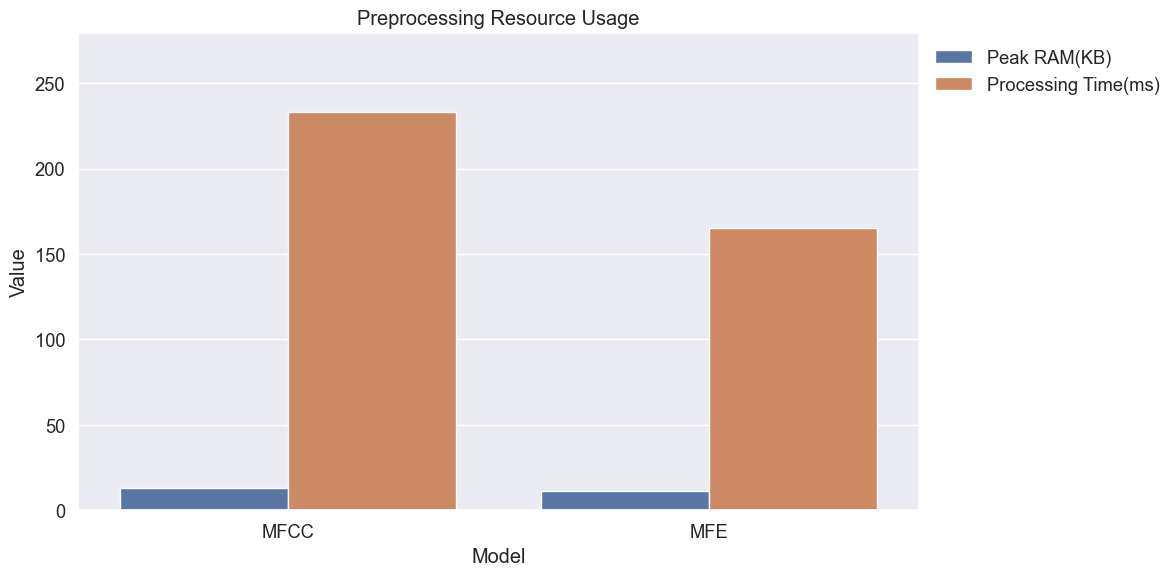

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for preprocessing resource usage
data_resources = {
    'Model': ['MFCC', 'MFE'],
    'Peak RAM(KB)': [13, 11],
    'Processing Time(ms)': [233, 165],
}

df_resources = pd.DataFrame(data_resources)

# Melt data for plotting
df_resources_melted = df_resources.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Create figure and axis (single subplot)
fig, axes = plt.subplots(1, 1, figsize=(12, 6))  # Single subplot

# Plot resource usage
sns.barplot(x='Model', y='Value', hue='Metric', data=df_resources_melted, ax=axes)
axes.set_title('Preprocessing Resource Usage')
axes.set_ylim(0, max(df_resources_melted['Value'].max() * 1.2, 100))
axes.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig('model_preprocess.png', dpi=300)
plt.show()